In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS 
from sklearn.model_selection import GridSearchCV

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Data Exploration

In [2]:
data = pd.read_csv('data/djia.csv')

In [3]:
data.head(5)

Date          Open          High           Low         Close  \
0  2016-12-30  19833.169922  19852.550781  19718.669922  19762.599609   
1  2016-12-29  19835.460938  19878.439453  19788.939453  19819.779297   
2  2016-12-28  19964.310547  19981.109375  19827.310547  19833.679688   
3  2016-12-27  19943.460938  19980.240234  19939.800781  19945.039062   
4  2016-12-23  19908.609375  19934.150391  19899.060547  19933.810547   

      Volume     Adj Close  
0  271910000  19762.599609  
1  172040000  19819.779297  
2  188350000  19833.679688  
3  158540000  19945.039062  
4  158260000  19933.810547

In [4]:
data.index = data['Date']

In [5]:
data = data.drop(['Date'],axis=1)

In [6]:
data.head()

Open          High           Low         Close     Volume  \
Date                                                                            
2016-12-30  19833.169922  19852.550781  19718.669922  19762.599609  271910000   
2016-12-29  19835.460938  19878.439453  19788.939453  19819.779297  172040000   
2016-12-28  19964.310547  19981.109375  19827.310547  19833.679688  188350000   
2016-12-27  19943.460938  19980.240234  19939.800781  19945.039062  158540000   
2016-12-23  19908.609375  19934.150391  19899.060547  19933.810547  158260000   

               Adj Close  
Date                      
2016-12-30  19762.599609  
2016-12-29  19819.779297  
2016-12-28  19833.679688  
2016-12-27  19945.039062  
2016-12-23  19933.810547

In [7]:
data['30ma'] = data['Adj Close'].rolling(window=30,min_periods=0).mean()

In [8]:
data2 = data.copy()
data2.index = [pd.to_datetime(date) for date in data2.index]

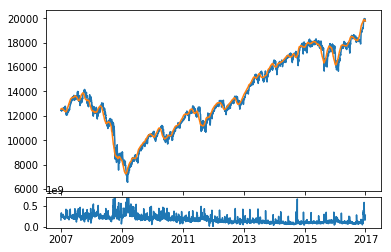

In [9]:
axis1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
axis2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex = axis1)
axis1.plot(data2.index,data['Adj Close'])
axis1.plot(data2.index,data['30ma'])
axis2.plot(data2.index,data['Volume'])

In [10]:
data2 = data.copy()
l = []
for date in data2.index:
    l.append(date[0:4])
data2.index = l

In [11]:
# Find the max Close price in every year
data2.groupby(data2.index)['Close'].max()

2006    12463.150391
2007    14164.530273
2008    13058.200195
2009    10548.509766
2010    11585.379883
2011    12810.540039
2012    13610.150391
2013    16576.660156
2014    18053.710938
2015    18312.390625
2016    19974.619141
Name: Close, dtype: float64

In [2]:
df = pd.read_pickle('data/news_data.pkl')

In [3]:
df.head(5)

close     adj close  \
2007-01-01  12469.971875  12469.971875   
2007-01-02  12472.245703  12472.245703   
2007-01-03  12474.519531  12474.519531   
2007-01-04  12480.690430  12480.690430   
2007-01-05  12398.009766  12398.009766   

                                                     articles  
2007-01-01  stick 06 somalia order islamists turn weapons ...  
2007-01-02   heart health  vitamin prevent death heart dis...  
2007-01-03   google answer fill job algorithm  germany  da...  
2007-01-04   help make shift combat commerce  addenda  ind...  
2007-01-05   rise ethanol raise concern corn food  new maj...

In [4]:
df['price'] = df['adj close'].apply(np.int64)

In [5]:
df = df[['price','articles']]

In [6]:
df['articles'] = df['articles'].map(lambda x: x.lstrip('.-'))

In [7]:
df.head(6)

price                                           articles
2007-01-01  12469  stick 06 somalia order islamists turn weapons ...
2007-01-02  12472   heart health  vitamin prevent death heart dis...
2007-01-03  12474   google answer fill job algorithm  germany  da...
2007-01-04  12480   help make shift combat commerce  addenda  ind...
2007-01-05  12398   rise ethanol raise concern corn food  new maj...
2007-01-06  12406   status quo secretary general  best buy circui...

In [18]:
df2 = df.copy()
l = []
for date in df2.index:
    l.append(date.year)
df2.index = l

In [19]:
df2.head()

price                                           articles
2007  12469  stick 06 somalia order islamists turn weapons ...
2007  12472   heart health  vitamin prevent death heart dis...
2007  12474   google answer fill job algorithm  germany  da...
2007  12480   help make shift combat commerce  addenda  ind...
2007  12398   rise ethanol raise concern corn food  new maj...

In [20]:
# Find the max Close price in every year
df2.groupby(df2.index)['price'].max()

2007    14164
2008    13154
2009    10548
2010    11585
2011    12810
2012    13610
2013    16576
2014    18053
2015    18312
2016    19974
Name: price, dtype: int64

In [21]:
# Finding the article words which lead to highest price in the year
ls = df2.groupby(df2.index)['price'].max()
ls.loc[2016]
for year in ls.index:    
    print(df2[df2['price']== ls.loc[year]]['articles'])    

2007     baboons think  yes  think   mail workers resu...
Name: articles, dtype: object
2008     children  study tie little sleep much weight ...
Name: articles, dtype: object
2009     death toll climb attack pakistani shiites  ch...
Name: articles, dtype: object
2010     turkey  thanksgiving  iran execute 2 men  say...
Name: articles, dtype: object
2011     south assess toll deadly barrage tornadoes  j...
Name: articles, dtype: object
2012     turkey  parliament back military measure syri...
Name: articles, dtype: object
2013     human brain  size really  everything  bomb at...
Name: articles, dtype: object
2014     israel  jewish republic   religious intoleran...
2015     scientists demonstrate animal mindmelds  prem...
2016     syria ceasefire crumble bomb kill dozens  lon...
Name: articles, dtype: object
2015     fruit fly show enter fearlike state  first  f...
Name: articles, dtype: object
2016     trump infrastructure plan work   volkswagen e...
Name: articles, dtype: object


In [22]:
art_list = df2.groupby(df2.index)['articles'].apply(lambda x: "{%s}" % ' '.join(x))

Year = 2007


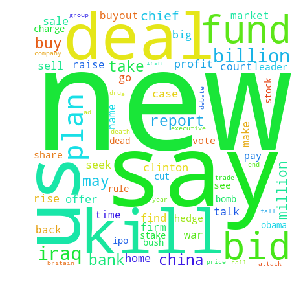

Year = 2008


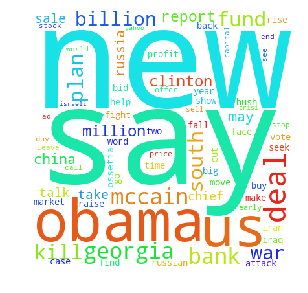

Year = 2009


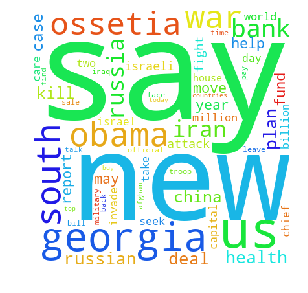

Year = 2010


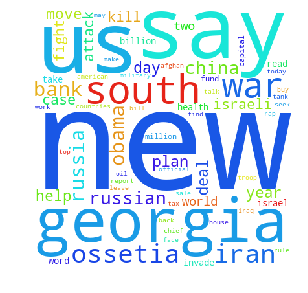

Year = 2011


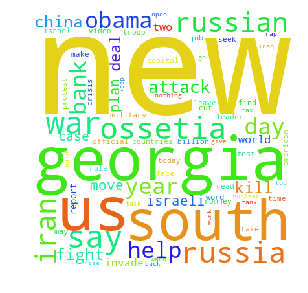

Year = 2012


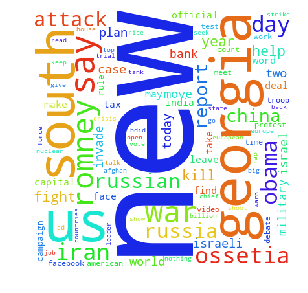

Year = 2013


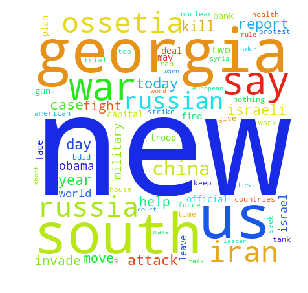

Year = 2014


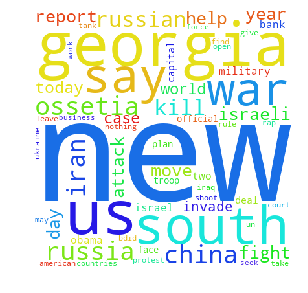

Year = 2015


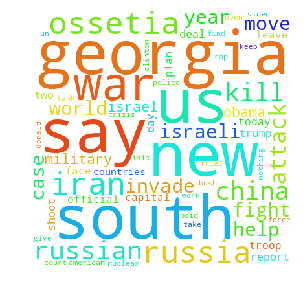

Year = 2016


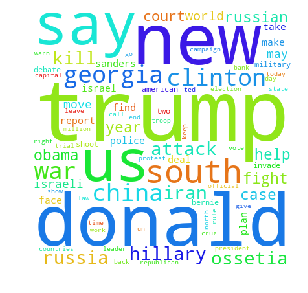

In [23]:
# What news(word) was trending over the years??
stopwords = set(STOPWORDS)
for i in art_list.index:
    wordcloud = WordCloud(width = 400, height = 400, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(art_list.loc[i]) 

    # plot the WordCloud image                        
    plt.figure(figsize = (4, 4), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    print('Year = {}'.format(i))
    plt.show()

In [24]:
# Lots of news regarding 'NEW' stuff probably influence the stock market a lot!!

# Data Manipulation

### SMA (Simple Moving Average)

In [ ]:
A simple moving average is calculated by finding the average price of the stock price over a specific number of periods.
For example a 5-day moving average would calaculate the average of last 5 days as the SMA of current day. The problem
with this implemenatation is that even if it smoothens the plot, it introduces a lag since the previous day prices are 
less than the current price.

### EMA (Exponential Moving Average)

In [ ]:
One way to get over the problem of lag is by using EMA. It is the weighted average of last n day prices where the 
weighting decreases exponentially with each previous price/period. 
It basically means that it gives higher weight to recent prices and the degree of contribution decays exponentially
as prices go further past..

In [ ]:
Image(filename='img/ema.png', width="400")

### MACD ( Moving Average Convergence Divergence )

In [ ]:
The moving average convergence divergence (MACD) is a technical momentum indicator, calculated for use with a 
variety of exponential moving averages (EMAs). It is used to know the trend in the stock market.

Steps:
1) Calculate a 12-period EMA of price for the chosen time period.
2) Calculate a 26-period EMA of price for the chosen time period.
3) Subtract the 26-period EMA from the 12-period EMA.
4) Calculate a nine-period EMA of the result obtained from step 3.

We have used this feature in this notebook.

We have used MACD(12,26,9)
The MACD Line is the 12-day Exponential Moving Average (EMA) less the 26-day EMA. 
Closing prices are used for these moving averages. 
A 9-day EMA of the MACD Line is plotted with the indicator to act as a signal line and identify turns.

The MACD Histogram represents the difference between MACD and its 9-day EMA, the signal line.

The histogram is positive when the MACD Line is above its Signal line and negative when the MACD Line is 
below its Signal line.

### Stochastic Oscillator

In [ ]:
The stochastic oscillator is a momentum indicator comparing the closing price of a security to the range of its 
prices over a certain period of time.

The stochastic oscillator is calculated using the following formula:

%K = 100(Current Close - Lowest Low)/(Highest High - Lowest Low)
%D = 3-period moving average of %K

Where:

Current Close = the most recent closing price

Lowest Low = the lowest low for the previous period

Highest High = the highest high for the previous period

%K = the current market rate for the stock price


The general theory serving as the foundation for this indicator is that in a market trending upward, prices will close 
near the high, and in a market trending downward, prices close near the low. Transaction signals are created when 
the %K crosses through a three-period moving average, which is called the %D.

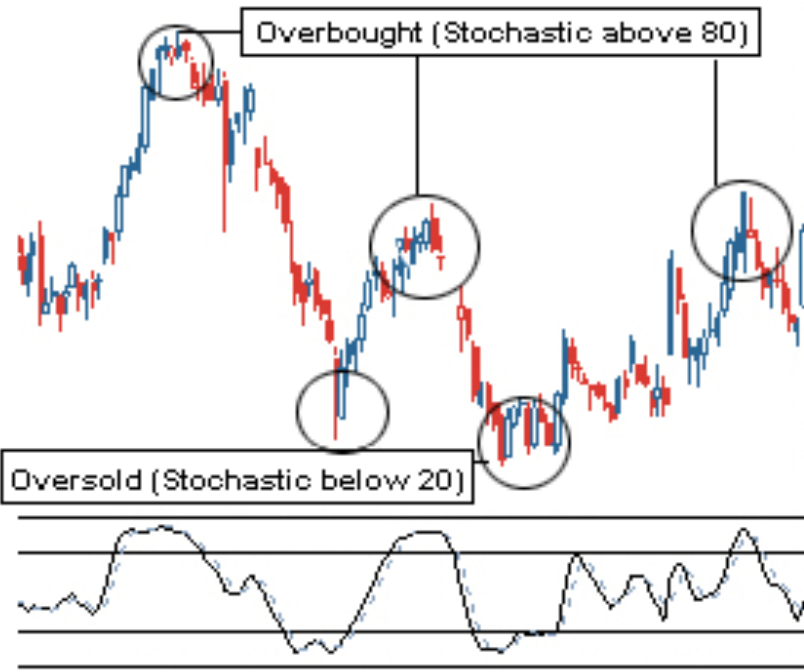

In [28]:
Image(filename='img/stochastic.png',width="300")

In [8]:
def MACD(df,period1,period2,periodSignal):
    EMA1 = pd.DataFrame.ewm(df,span=period1).mean()    # By giving a span value, we specify the alpha = 2/(span + 1)
    EMA2 = pd.DataFrame.ewm(df,span=period2).mean()
    MACD = EMA1-EMA2
    
    signal = pd.DataFrame.ewm(MACD,periodSignal).mean()    
    
    histogram = MACD-signal
    
    return histogram

def stochastics_oscillator(df,period):
    # Finding the lowest low and highest high
    l, h = pd.DataFrame.rolling(df, period).min(), pd.DataFrame.rolling(df, period).max() 
    
    k = 100 * (df - l) / (h - l)
    return k


In [9]:
df['macd'] = MACD(df['price'],12,26,9)
df['stochastics'] = stochastics_oscillator(df['price'],14)

In [10]:
df.dropna(inplace=True)

In [11]:
df.head(5)

price                                           articles  \
2007-01-14  12569   smoke damage  mr spitzer  task court reform  ...   
2007-01-15  12575   mentally ill  behind bar  bp  chief join apax...   
2007-01-16  12582   king day atlanta   one without mrs king   isr...   
2007-01-17  12577   racial hate feed gang war  senseless kill  is...   
2007-01-18  12567   taliban detainee say rebel chief hide pakista...   

                 macd  stochastics  
2007-01-14  12.762211   100.000000  
2007-01-15  13.711670   100.000000  
2007-01-16  14.146180   100.000000  
2007-01-17  13.569798    97.282609  
2007-01-18  12.039695    91.847826

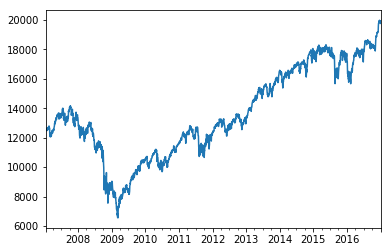

In [29]:
df['price'].plot()  # General idea of stock price change over the years..

In [12]:
df_main = df[['price','macd','stochastics']].copy()

In [13]:
df_main.head(5)

price       macd  stochastics
2007-01-14  12569  12.762211   100.000000
2007-01-15  12575  13.711670   100.000000
2007-01-16  12582  14.146180   100.000000
2007-01-17  12577  13.569798    97.282609
2007-01-18  12567  12.039695    91.847826

In [14]:
df_main['total'] = ''
df_main['positive'] = ''
df_main['neutral'] = ''
df_main['negative'] = ''

In [15]:
df_main.head(5)

price       macd  stochastics total positive neutral negative
2007-01-14  12569  12.762211   100.000000                                
2007-01-15  12575  13.711670   100.000000                                
2007-01-16  12582  14.146180   100.000000                                
2007-01-17  12577  13.569798    97.282609                                
2007-01-18  12567  12.039695    91.847826

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

sid = SentimentIntensityAnalyzer()

for date in df.index:
    try:
        sent = unicodedata.normalize('NFKD', df.loc[date, 'articles'])   
        ss = sid.polarity_scores(sent)
        df_main.set_value(date, 'total', ss['compound'])    # Enter the value = ss['compound'] in entry (date,'total')
        df_main.set_value(date, 'positive', ss['pos'])        
        df_main.set_value(date, 'neutral', ss['neu'])
        df_main.set_value(date, 'negative', ss['neg'])        
    except TypeError:
        print(df.loc[date, 'articles'])
        print(date)

In [35]:
# Example
sentence = 'Dow jumps 224 points Friday, extends 2018 gain to 7.7%'
sid = SentimentIntensityAnalyzer()
score = sid.polarity_scores(sentence)
score

{'compound': 0.5994, 'neg': 0.0, 'neu': 0.62, 'pos': 0.38}

In [17]:
df_main.head(5)

price       macd  stochastics   total positive neutral negative
2007-01-14  12569  12.762211   100.000000 -0.9538    0.153   0.662    0.186
2007-01-15  12575  13.711670   100.000000 -0.9314    0.118   0.726    0.156
2007-01-16  12582  14.146180   100.000000 -0.9971    0.095   0.737    0.168
2007-01-17  12577  13.569798    97.282609 -0.9976    0.118   0.677    0.204
2007-01-18  12567  12.039695    91.847826 -0.9986    0.095    0.68    0.224

# Metrics for Regression Models

### Mean Absolute Error

In [ ]:
It is calculated by the sum of absolute difference between predicted and actual value. But it does not indicate the 
direction (overpredicting or underpredicting)

### Root Mean Squared Error

In [ ]:
It is calculated by the mean of the sum of squares of the difference between predicted and actual value. Then the 
square root of it is taken. 

### R^2 metric

In [ ]:
It indicated the goodness of fit with a value between 0(poor fit) and 1(best fit)

In [ ]:
# I have used RMSE as the metric here as it indicated the difference between the values well. Higher Cost is given when
# the predicted value is far from actual one..

In [18]:
from datetime import datetime, timedelta

def create_train(df_test,start_train):
    #print((datetime.strptime(start_train,"%Y-%m-%d")-timedelta(days=31)).strftime('%Y-%m-%d'))
    train = df_test.loc[(datetime.strptime(start_train,"%Y-%m-%d")-timedelta(days=13)).strftime('%Y-%m-%d'):start_train]
    sent_score = []
    for date in train.index:
        score = np.asarray([df_test.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_test.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        sent_score.append(score)
    n_train = np.asarray(sent_score)
    
    return train,n_train
    

In [38]:
df_test = df_main.copy()
x,y = create_train(df_test,"2007-1-27")

In [39]:
x

price       macd  stochastics   total positive neutral negative
2007-01-14  12569  12.762211   100.000000 -0.9538    0.153   0.662    0.186
2007-01-15  12575  13.711670   100.000000 -0.9314    0.118   0.726    0.156
2007-01-16  12582  14.146180   100.000000 -0.9971    0.095   0.737    0.168
2007-01-17  12577  13.569798    97.282609 -0.9976    0.118   0.677    0.204
2007-01-18  12567  12.039695    91.847826 -0.9986    0.095    0.68    0.224
2007-01-19  12565  10.348046    90.340909 -0.9834    0.094   0.779    0.127
2007-01-20  12536   7.031067    72.619048   -0.93    0.117    0.74    0.143
2007-01-21  12506   2.618604    54.216867 -0.9758    0.127   0.687    0.185
2007-01-22  12477  -2.371970    36.746988 -0.8885    0.122   0.741    0.137
2007-01-23  12533  -2.479727    65.000000 -0.9991    0.088   0.707    0.206
2007-01-24  12621   2.795543   100.000000 -0.9947    0.135   0.678    0.187
2007-01-25  12502  -1.147924    17.361111 -0.9927    0.142   0.671    0.187
2007-01-26  12487  -4.919694     6.944444 -0.9967    0.107    0.71    0.183
2007-01-27  12488  -7.440936     7.638889 -0.9967    0.095   0.684    0.221

In [116]:
def smooth(start_test,test,prediction):
    d1 = start_test
    avg_real_price = 0
    avg_predicted_price = 0
    days = 7
    
    #print(test)
    for i in range(days):
        avg_real_price = avg_real_price + test.loc[d1]['price']
        d1 = (datetime.strptime(d1,"%Y-%m-%d")+timedelta(days=1)).strftime('%Y-%m-%d')
    avg_real_price = avg_real_price/days
    
    d1 = start_test
    for i in range(days):
        avg_predicted_price = avg_predicted_price + prediction.loc[d1]['price']
        d1 = (datetime.strptime(d1,"%Y-%m-%d")+timedelta(days=1)).strftime('%Y-%m-%d')
    avg_predicted_price = avg_predicted_price/days
        
    return (avg_real_price - avg_predicted_price)            

# Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=14,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


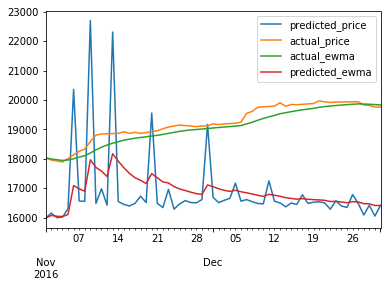

In [120]:
df_test = df_main.copy()
years = [2016]#, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []
for year in years:
    start_train = str(year) + '-01-27'
    start_test = str(year) + '-01-28'
    end_test = str(year) + '-12-31'
    actual_test = df_main[start_test:end_test]
    test = df_test.loc[start_test:end_test]
    
    prediction = []
    for date in test.index:
        sent_score = []        
        train,n_train = create_train(df_test,start_train)

        score = np.asarray([df_test.loc[date,'macd'],df_test.loc[date,'stochastics'],
                            df_test.loc[date,'total'],df_test.loc[date,'positive'],
                           df_test.loc[date,'neutral'],df_test.loc[date,'negative']])
        sent_score.append(score)
        n_test = np.asarray(sent_score)    
        
        lin_reg = LinearRegression()
        lin_reg.fit(n_train,train['price'])
    
        pred = lin_reg.predict(n_test)
        prediction.append(pred[0])
        
        df_test.loc[date,'price'] = pred[0]

        start_train = date.strftime('%Y-%m-%d')
    

    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=prediction[0:],index=idx,columns=['price'])
    #print(pred_data)
    pred_data['price'] = pred_data['price'] + smooth(start_test,actual_test,pred_data)
    pred_data = pred_data.loc['2016-11-01':'2016-12-31']
    pred_data['actual_value'] = actual_test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=14,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=14,freq='D')
    
    # Changing column names
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
    #print(pred_data['predicted_price'])
    #print(pred_data['actual_price'])
    
    pred_data.plot()


In [98]:
l = [int(x) for x in pred_data['predicted_price']]

In [99]:
l[0:4]

[16344, 16373, 16385, 16437]

In [100]:
metrics.accuracy_score(actual_test['price'],l)

0.0

# Checking for RMSE error

In [121]:
error = abs(pred_data['predicted_price'] - pred_data['actual_price'])
total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error)

2819.0959629399736


## Defining a margin

In [102]:
def allow_margin(test,pred_data):
    c = 0
    for i in range(0,len(test['price'])):
        if test['price'][i] - pred_data['predicted_price'][i] <= 1000:
            c = c + 1

    print('{0} predictions were approximately correct'.format(c))

In [103]:
allow_margin(actual_test,pred_data)

77 predictions were approximately correct


# Trying to improve the model by scaling the feature attributes

In [57]:
I thought normalizing the features would help the model to improve as would converge faster to the local minima of
cost function bcoz the price attribute and postive,negative,neutral attributes have difference in range of values..

But i learned since the price attribute majorly influences the stock price change, due to scaling the effect of
it on the predicted values was less. So, scaling is not preferable here.

# Checking for MultiCollinearity

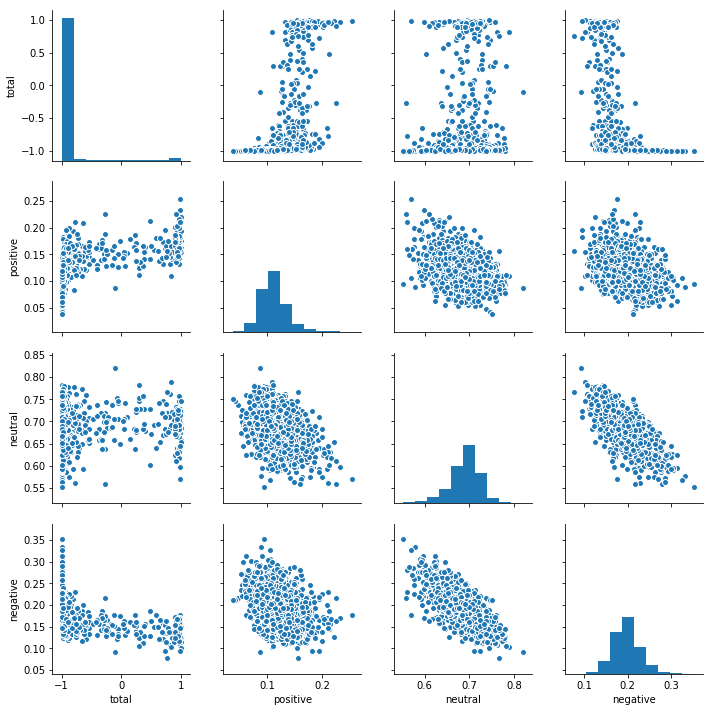

In [74]:
df_analysis = df_main[['total','positive','neutral','negative']]
sns.pairplot(df_analysis)

In [59]:
# We can see that some of the independant attributes itself have a relation between them. So keeping all of them is
# not necessary. But for learning process i have kept it..

# Implementing Ridge Regression

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


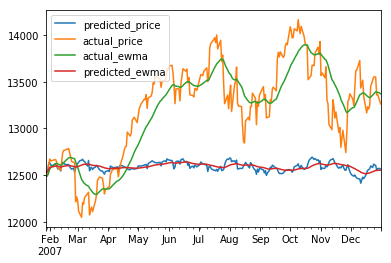

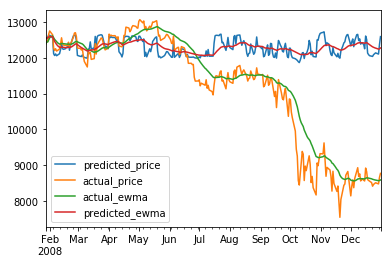

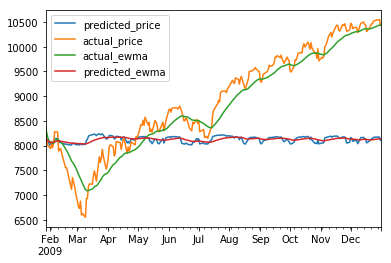

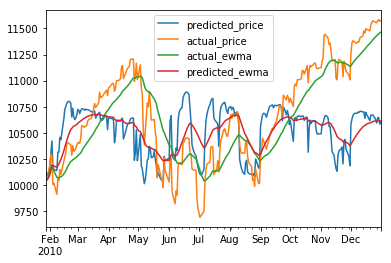

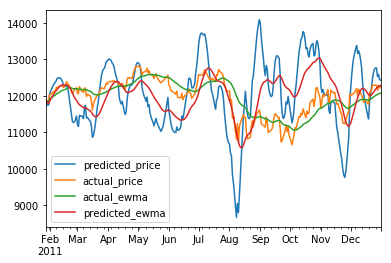

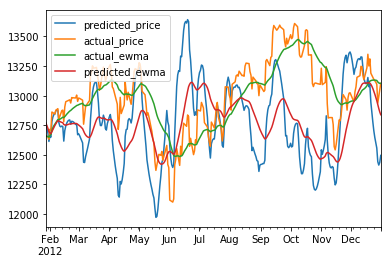

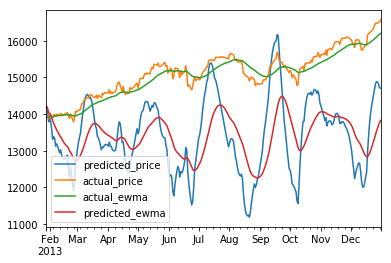

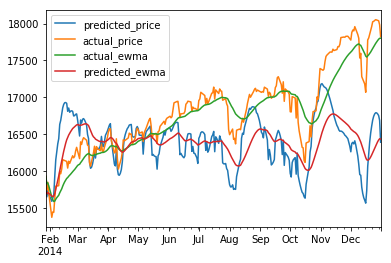

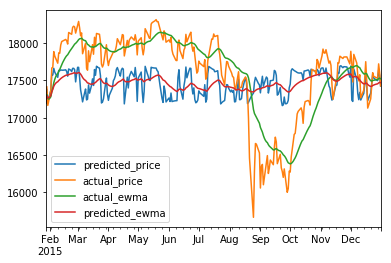

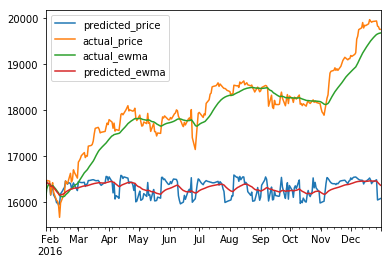

In [104]:
# Bring it on regularization!!
from sklearn.linear_model import Ridge
df_test = df_main.copy()

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-27'
    start_test = str(year) + '-01-28'
    end_test = str(year) + '-12-31'
    actual_test = df_main[start_test:end_test]
    test = df_test.loc[start_test:end_test]
    
    prediction = []
    for date in test.index:
        sent_score = []        
        train,n_train = create_train(df_test,start_train)

        score = np.asarray([df_test.loc[date,'macd'],df_test.loc[date,'stochastics'],
                            df_test.loc[date,'total'],df_test.loc[date,'positive'],
                           df_test.loc[date,'neutral'],df_test.loc[date,'negative']])
        sent_score.append(score)
        n_test = np.asarray(sent_score)    
        
    
        ridge = Ridge(fit_intercept=True, alpha=0.5)


        ridge.fit(n_train,train['price'])

        pred = ridge.predict(n_test)
        prediction.append(pred[0])
        
        df_test.loc[date,'price'] = pred[0]

        start_train = date.strftime('%Y-%m-%d')  
            
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=prediction[0:],index=idx,columns=['price'])
    pred_data['price'] = pred_data['price'] + smooth(start_test,actual_test,pred_data)
    
    pred_data['actual_value'] = actual_test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=30,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=30,freq='D')
    
    # Changing column names
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
    pred_data.plot()

In [105]:
# RMSE Error
error = abs(pred_data['predicted_price'] - pred_data['actual_price'])
total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error)

1928.1497742600056


In [77]:
# RMSE Improves !! as expected :)

In [78]:
# Check the performance with different values of alpha (for year 2016)
    
print('Ridge Regression')
print('alpha\t RMSE\t')
alpha = np.linspace(0.5,30,50)
    
from sklearn.linear_model import Ridge
df_test = df_main.copy()

years = [2016]
prediction = []

for a in alpha:
    
    for year in years:
        start_train = str(year) + '-01-27'
        start_test = str(year) + '-01-28'
        end_test = str(year) + '-12-31'
        actual_test = df_main[start_test:end_test]
        test = df_test.loc[start_test:end_test]

        prediction = []
        for date in test.index:
            sent_score = []        
            train,n_train = create_train(df_test,start_train)

            score = np.asarray([df_test.loc[date,'macd'],df_test.loc[date,'stochastics'],
                                df_test.loc[date,'total'],df_test.loc[date,'positive'],
                               df_test.loc[date,'neutral'],df_test.loc[date,'negative']])
            sent_score.append(score)
            n_test = np.asarray(sent_score)    


            ridge = Ridge(fit_intercept=True, alpha=a)   # alpha = Regularization strength 


            ridge.fit(n_train,train['price'])

            pred = ridge.predict(n_test)
            prediction.append(pred[0])

            df_test.loc[date,'price'] = pred[0]

            start_train = date.strftime('%Y-%m-%d') 
        

    error = abs(prediction[0:] - actual_test['price'])

    total_error = np.dot(error,error)
    rmse = np.sqrt(total_error/len(prediction))
    print('{:.3f}\t {:.4f}\t'.format(a,rmse))


Ridge Regression
alpha	 RMSE	
0.500	 2077.1778	
1.102	 2072.6360	
1.704	 2068.4108	
2.306	 2064.4813	
2.908	 2060.8287	
3.510	 2057.4336	
4.112	 2054.2772	
4.714	 2051.3419	
5.316	 2048.6114	
5.918	 2046.0707	
6.520	 2043.7061	
7.122	 2041.5050	
7.724	 2039.4558	
8.327	 2037.5481	
8.929	 2035.7721	
9.531	 2034.1188	
10.133	 2032.5801	
10.735	 2031.1483	
11.337	 2029.8166	
11.939	 2028.5785	
12.541	 2027.4281	
13.143	 2026.3597	
13.745	 2025.3684	
14.347	 2024.4494	
14.949	 2023.5983	
15.551	 2022.8110	
16.153	 2022.0838	
16.755	 2021.4130	
17.357	 2020.7954	
17.959	 2020.2280	
18.561	 2019.7078	
19.163	 2019.2321	
19.765	 2018.7984	
20.367	 2018.4045	
20.969	 2018.0480	
21.571	 2017.7270	
22.173	 2017.4395	
22.776	 2017.1836	
23.378	 2016.9577	
23.980	 2016.7601	
24.582	 2016.5894	
25.184	 2016.4441	
25.786	 2016.3229	
26.388	 2016.2245	
26.990	 2016.1477	
27.592	 2016.0915	
28.194	 2016.0547	
28.796	 2016.0363	
29.398	 2016.0355	
30.000	 2016.0512	


In [278]:
# As alpha increases, the RMSE error decreases.. 

### Using Stochastic Gradient Descent

In [ ]:
The implementation of linear regression using batch gradient descent as default optimization technique for updating the
weights but i am trying it out with stochastic gradient descent(SGD), an advance version of that.

In case of batch(Vanilla) gradient descent, while optimizing the weights, we sum up along the whole dataset for each 
theta(weight), where as in SGD, we are using the cost gradient of 1 example at each iteration, instead of using the 
sum of the cost gradient of ALL examples. 

It is calculated after shuffling the training set. It reduces the training
time and sometimes gives optimal minima instead of local due to its randomness. (done till we get minimum cost..)
Can be very inefficient if gets stuck if local minima due to the randomness.

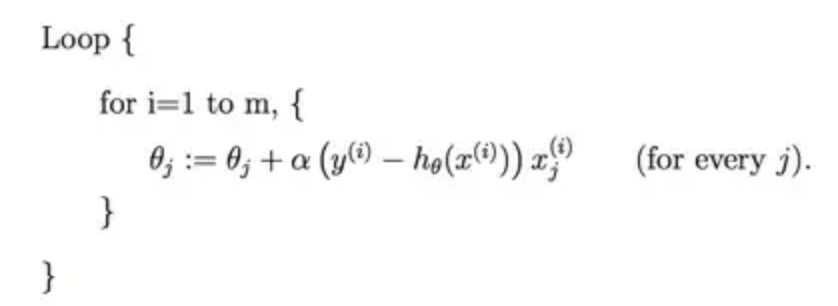

In [65]:
# Gradient Descent
Image(filename='img/gd.png',width="400")

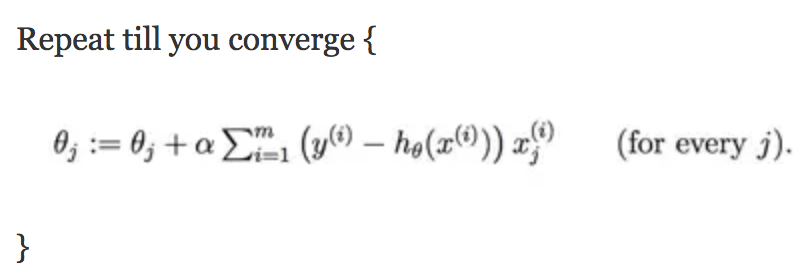

In [66]:
# Stochastic Gradient Descent
Image(filename='img/sgd.png',width="400")

In [84]:
from sklearn.linear_model import SGDRegressor
df_test = df_main.copy()

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-27'
    start_test = str(year) + '-01-28'
    end_test = str(year) + '-12-31'
    actual_test = df_main[start_test:end_test]
    test = df_test.loc[start_test:end_test]
    
    prediction = []
    for date in test.index:
        sent_score = []        
        train,n_train = create_train(df_test,start_train)

        score = np.asarray([df_test.loc[date,'macd'],df_test.loc[date,'stochastics'],
                            df_test.loc[date,'total'],df_test.loc[date,'positive'],
                           df_test.loc[date,'neutral'],df_test.loc[date,'negative']])
        sent_score.append(score)
        n_test = np.asarray(sent_score) 
    
        reg = SGDRegressor(loss='squared_loss',penalty='l2',alpha=0.0001,learning_rate='constant',eta0=0.01,n_iter=1000)
        reg.fit(n_train,train['price'])
    
        pred = reg.predict(n_test)
        prediction.append(pred[0])
        
        df_test.loc[date,'price'] = pred[0]

        start_train = date.strftime('%Y-%m-%d')         

    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=prediction[0:],index=idx,columns=['price'])
    
    pred_data

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

In [85]:
# Check RMSE
error = abs(pred_data['price'] - actual_test['price'])
total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['price']))
print(rmse_error)

303648771736648.75


In [69]:
# The answer is random and very large, i.e. we get stuck in local minima while finding the cost.. (not preferable)

# Decision Tree Regression

In [74]:
# So before attempting this i think this would lead to a better accuracy as compared to other models as it captures 
# the intuition of the prices of stock when the sentiment values are near each other(i.e. postive,negative,neutral)
# bcoz in this type of classification, the values are predicted after the training data is segregated based on the 
# value of their attribute values.

# It should capture the intuition well of the increase or decrease of prices as compared to other models
# The accuracy can be low as the implementation give mean value of the box(made by training) where the testing data 
# belongs to while testing

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

12586.42857142857 12568.57142857143


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


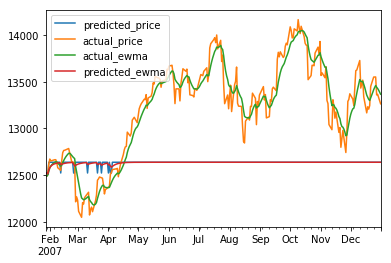

In [114]:
df_test = df_main.copy()

years = [2007]#, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-27'
    start_test = str(year) + '-01-28'
    end_test = str(year) + '-12-31'
    actual_test = df_main[start_test:end_test]
    test = df_test.loc[start_test:end_test]
    
    prediction = []
    for date in test.index:
        sent_score = []        
        train,n_train = create_train(df_test,start_train)

        score = np.asarray([df_test.loc[date,'macd'],df_test.loc[date,'stochastics'],
                            df_test.loc[date,'total'],df_test.loc[date,'positive'],
                           df_test.loc[date,'neutral'],df_test.loc[date,'negative']])
        sent_score.append(score)
        n_test = np.asarray(sent_score)        
    
        dtr = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None)
        dtr.fit(n_train,train['price'])

        pred = dtr.predict(n_test)
        prediction.append(pred[0])
        
        df_test.loc[date,'price'] = pred[0]

        start_train = date.strftime('%Y-%m-%d')         
        
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=prediction[0:],index=idx,columns=['price'])
    #print(pred_data['price'])
    
    pred_data['price'] = pred_data['price'] + smooth(start_test,actual_test,pred_data)
    
    #print(pred_data['price'])
    #print(actual_test['price'])
    pred_data['actual_value'] = actual_test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=10,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=10,freq='D')
    
    # Changing column names
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
    pred_data.plot()

In [306]:
# It does not have good accuracy as compared to previous models. (varies with running due to different splits) 

# Using Bagging

In [321]:
from sklearn.ensemble import BaggingRegressor

# Using 2016 year upto some limit
years = [2016]
max_n_ests = 100
l = []
for j in [500,1000,5000,99999]:
    dtr = DecisionTreeRegressor(max_features=None,max_leaf_nodes=j)
    #print(j)
    for i in np.arange(1,max_n_ests):
            
        for year in years:
            start_train = str(year) + '-01-27'
            start_test = str(year) + '-01-28'
            end_test = str(year) + '-12-31'
            actual_test = df_main[start_test:end_test]
            test = df_test.loc[start_test:end_test]

            prediction = []
            for date in test.index:
                sent_score = []        
                train,n_train = create_train(df_test,start_train)

                score = np.asarray([df_test.loc[date,'macd'],df_test.loc[date,'stochastics'],
                                    df_test.loc[date,'total'],df_test.loc[date,'positive'],
                                   df_test.loc[date,'neutral'],df_test.loc[date,'negative']])
                sent_score.append(score)
                n_test = np.asarray(sent_score)    


                baglfy=BaggingRegressor(base_estimator=dtr , n_estimators=i,
                    max_samples=1.0)
                baglfy=baglfy.fit(n_train,train['price'])

                pred = baglfy.predict(n_test)
                prediction.append(pred[0])

                df_test.loc[date,'price'] = pred[0]

                start_train = date.strftime('%Y-%m-%d') 


        error = abs(prediction[0:] - actual_test['price'])
        
        total_error = np.dot(error,error)
        # Compute RMSE
        rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
        print(rmse_error)
        l.append(rmse_error)

2324.6349838758742
2046.5899492566464
2069.0534517278365
2200.994648720353
2177.5988520510205
2131.5139126802896
2182.585599920162
2147.3237044880525
2133.065925355039
2167.898131841339
2159.7065790651986
2122.9301168820816
2139.879060152718
2146.2586177062376
2180.4816047886006
2110.22749164823
2159.3510715626066
2148.9502104658372
2153.8644002735045
2142.3186284355097
2202.1498687430058
2162.0261001095387
2138.7494724090093
2172.254100423721
2163.690856979198
2177.9711412155866
2157.7163066686135
2164.551197457111
2177.663284907013
2158.140164837671
2144.726764317844
2147.9959682324206
2157.333699160009
2148.0763041644254
2143.795759545975
2175.3366790643795
2132.6592804699517
2175.7883552038065
2162.4826293394017
2167.796106386046
2142.75084961997
2151.949695122631
2165.741639357975
2151.2539608647967
2140.9844120959665
2129.622014884454
2180.8953712622356
2158.4168009210825
2149.643145108714
2185.6634700537215
2178.656977861139
2161.556870467858
2169.02200097234
2175.0288036415996


KeyboardInterrupt: 

In [322]:
# Lowest RMSE error
print(min(l))

2046.5899492566464


# Using Boosting

In [323]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

            
for year in years:
    start_train = str(year) + '-01-27'
    start_test = str(year) + '-01-28'
    end_test = str(year) + '-12-31'
    actual_test = df_main[start_test:end_test]
    test = df_test.loc[start_test:end_test]

    prediction = []
    for date in test.index:
        sent_score = []        
        train,n_train = create_train(df_test,start_train)

        score = np.asarray([df_test.loc[date,'macd'],df_test.loc[date,'stochastics'],
                            df_test.loc[date,'total'],df_test.loc[date,'positive'],
                           df_test.loc[date,'neutral'],df_test.loc[date,'negative']])
        sent_score.append(score)
        n_test = np.asarray(sent_score)    


        reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                                  n_estimators=500)

        reg.fit(n_train,train['price'])


        pred = reg.predict(n_test)
        prediction.append(pred[0])

        df_test.loc[date,'price'] = pred[0]

        start_train = date.strftime('%Y-%m-%d') 

error = abs(prediction[0:] - actual_test['price'])

total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error)

2136.83695472805


# Random Forest Regression

In [82]:
# This works the same as decision tree, the only thing different in this implemenation is that it involves many 
# decision tree implementation (which means it explores many different types of segregation of data) and gives 
# the average of the values obtained by each tree when training on the data.

# It should perform better than Decision Tree implementation.

                   price
2007-01-28  12495.300000
2007-01-29  12496.600000
2007-01-30  12494.500000
2007-01-31  12592.400000
2007-02-01  12566.100000
2007-02-02  12582.240000
2007-02-03  12588.428000
2007-02-04  12583.297600
2007-02-05  12594.139600
2007-02-06  12593.821040
2007-02-07  12569.225072
2007-02-08  12576.960056
2007-02-09  12562.249136
2007-02-10  12544.242674
2007-02-11  12515.317069
2007-02-12  12499.923414
2007-02-13  12554.036687
2007-02-14  12578.868973
2007-02-15  12579.090989
2007-02-16  12579.118924
2007-02-17  12584.044682
2007-02-18  12583.391535
2007-02-19  12586.748187
2007-02-20  12573.403151
2007-02-21  12572.042673
2007-02-22  12568.339719
2007-02-23  12548.908621
2007-02-24  12528.130875
2007-02-25  12521.465987
2007-02-26  12507.719164
...                  ...
2007-12-02  12534.811391
2007-12-03  12534.811391
2007-12-04  12534.811391
2007-12-05  12534.811391
2007-12-06  12534.811391
2007-12-07  12534.811391
2007-12-08  12534.811391
2007-12-09  12534.811391


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


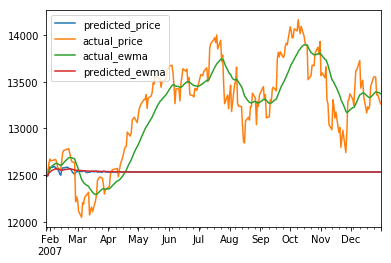

In [44]:
df_test = df_main.copy()
years = [2007]#, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-27'
    start_test = str(year) + '-01-28'
    end_test = str(year) + '-12-31'
    actual_test = df_main[start_test:end_test]
    test = df_test.loc[start_test:end_test]
    
    prediction = []
    for date in test.index:
        sent_score = []        
        train,n_train = create_train(df_test,start_train)

        score = np.asarray([df_test.loc[date,'macd'],df_test.loc[date,'stochastics'],
                            df_test.loc[date,'total'],df_test.loc[date,'positive'],
                           df_test.loc[date,'neutral'],df_test.loc[date,'negative']])
        sent_score.append(score)
        n_test = np.asarray(sent_score)        
    
        rft = RandomForestRegressor()
        rft.fit(n_train,train['price'])

        pred = rft.predict(n_test)
        prediction.append(pred[0])
        
        df_test.loc[date,'price'] = pred[0]

        start_train = date.strftime('%Y-%m-%d')         

        
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=prediction[0:],index=idx,columns=['price'])
    
    print(pred_data)
    print(actual_test['price'])
    
    pred_data['actual_value'] = actual_test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=30,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=30,freq='D')
    
    # Changing column names
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
    pred_data.plot()
    

In [329]:
# Check the RMSE error
error = abs(pred_data['predicted_price'] - pred_data['actual_price'])
total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error)

1896.5886249806936


In [85]:
# It performs pretty better than expected and captures the intution of rise and fall very well. Probably the best model
# till now

# Let's Work on making it better !!

In [88]:
# So here i am going to work on different parameters on the best model we have till now, i.e. Random Forest Tree
# using GridSearchCV
# Lets Gooo!!

# n_estimators = Number of trees in random forest

# max_features = Number of features to consider at every split

# max_depth = Maximum number of levels in tree

# min_samples_split = Minimum number of samples required to split a node

# min_samples_leaf = Minimum number of samples required at each leaf node

# bootstrap = Method of selecting samples for training each tree

# Testing on the whole dataset to get the parameters..
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()

# Using the GridSearchCV on the last year data as the trend depends on the latest year..
grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid.fit(df_main, df_main['price'])

# We try out 1 * 4 * 2 * 3 * 3 * 4 = 288 combinations

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_d

[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.3s


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   1.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_sam

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   1.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   1.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   1.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   1.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   1.7s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   1.0s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, m

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min


[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   1.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, 

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   1.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, 

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   1.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, m

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   1.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   1.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, mi

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   1.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   1.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   1.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   1.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   1.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   1.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.1min


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   1.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samp

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   1.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_sam

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   1.8s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   1.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2

[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   1.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   1.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   1.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   1.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   5.0s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   1.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   1.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max

[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   4.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   4.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   1.2s
[CV] bootstrap=True, max_depth=100, max_f

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   5.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   5.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   1.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_f

[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   1.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   6.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   6.4s
[CV] bootstrap=True, max_depth=100, max_fe

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_fea

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.7min


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   1.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   5.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   1.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   1.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max

[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   4.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   4.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   1.2s
[CV] bootstrap=True, max_depth=110, max_f

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   4.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   4.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_f

[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   3.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   3.8s
[CV] bootstrap=True, max_depth=110, max_fe

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_feat

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   1.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   1.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_fe

[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [89]:
best_grid = grid.best_estimator_
print(best_grid)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/ana

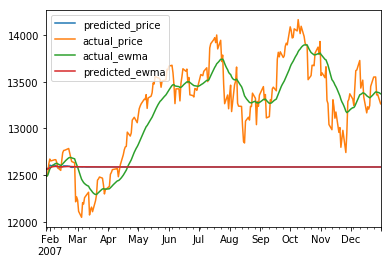

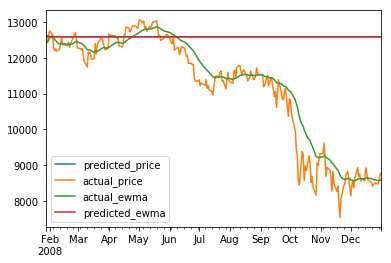

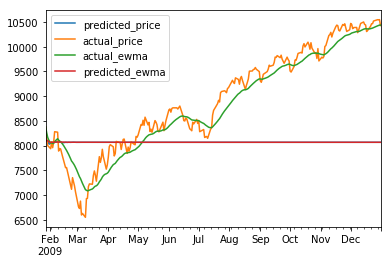

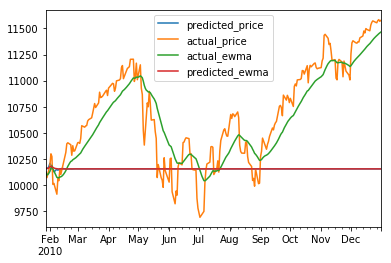

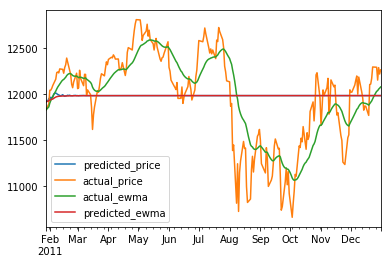

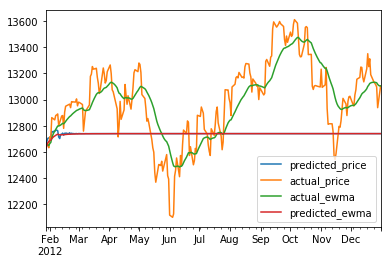

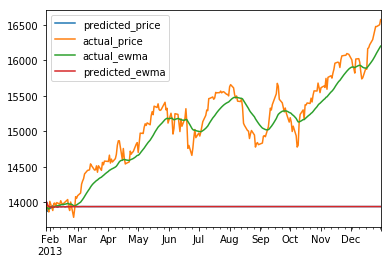

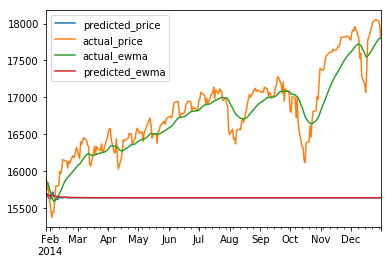

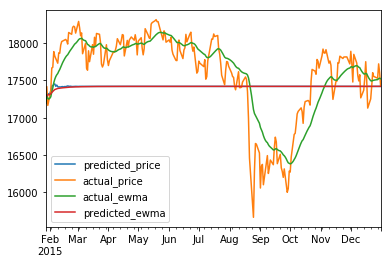

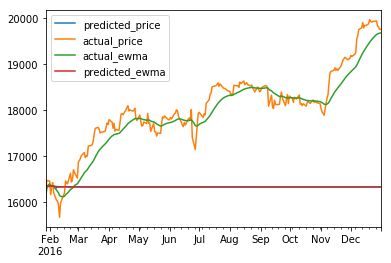

In [107]:
# Testing it out..

df_test = df_main.copy()

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-27'
    start_test = str(year) + '-01-28'
    end_test = str(year) + '-12-31'
    actual_test = df_main[start_test:end_test]
    test = df_test.loc[start_test:end_test]
    
    prediction = []
    for date in test.index:
        sent_score = []        
        train,n_train = create_train(df_test,start_train)

        score = np.asarray([df_test.loc[date,'macd'],df_test.loc[date,'stochastics'],
                            df_test.loc[date,'total'],df_test.loc[date,'positive'],
                           df_test.loc[date,'neutral'],df_test.loc[date,'negative']])
        sent_score.append(score)
        n_test = np.asarray(sent_score)        
    
        rft = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

        rft.fit(n_train,train['price'])

        pred = rft.predict(n_test)
        prediction.append(pred)
        
        df_test.loc[date,'price'] = pred[0]

        start_train = date.strftime('%Y-%m-%d')         

        
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=prediction[0:],index=idx,columns=['price'])
    
    pred_data['price'] = pred_data['price'] + smooth(start_test,actual_test,pred_data)

    
    pred_data['actual_value'] = actual_test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=30,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=30,freq='D')
    
    # Changing column names
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
    pred_data.plot()
        

In [108]:
# Check the RMSE error
error = abs(pred_data['predicted_price'] - pred_data['actual_price'])
total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error)

1926.2925966372784


In [92]:
# The rmse error decreases..

# Boosting Vs Bagging Vs Random Forest Regression 

In [ ]:
# Tough Fight..

From my inferences and learning what they actually do, i inferred that even though both use decision tree as the base
for learning, they work in the opposite way. 

Boosting works on reducing bias and has shallow trees whereas Random Forest works on reducing variance and has deep
trees

In Bagging, the idea is to create several subsets of data from training sample chosen randomly with replacement. 
Now, each collection of subset data is used to train their decision trees. (Works on reducing variance)

Random Forest is an extension of bagging. Along with what bagging does, it also selects the random features rather 
than using all features to grow trees.

# Support Vector Regression (SVR)

In [ ]:
"""
from sklearn.svm import SVR
svr2 = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr3 = SVR(kernel='poly', C=1e3, degree=2)
"""

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


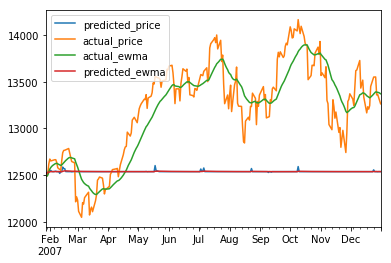

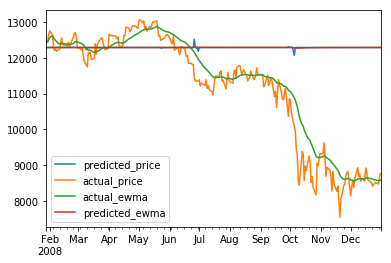

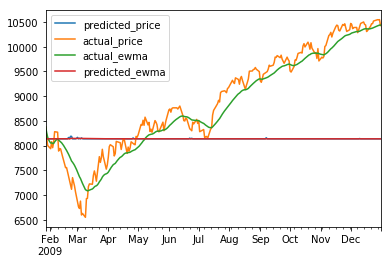

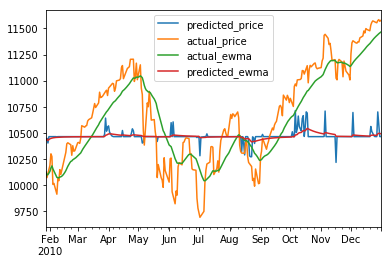

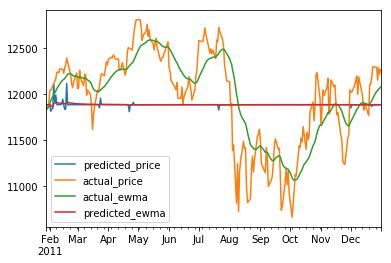

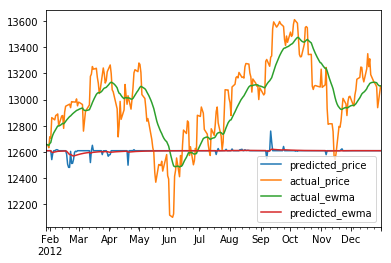

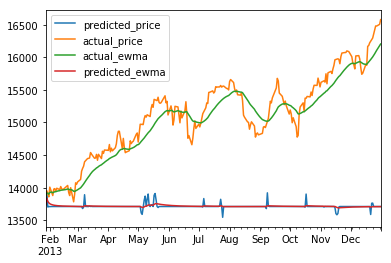

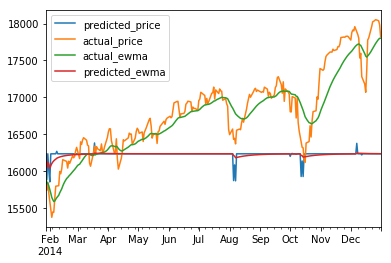

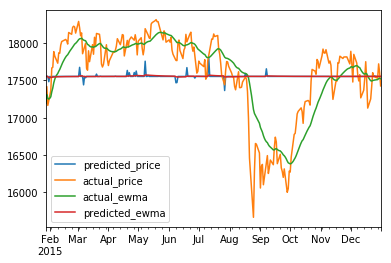

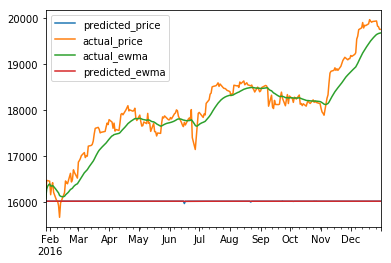

In [41]:
# Testing it out..
from sklearn.svm import SVR
df_test = df_main.copy()

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

for year in years:
    start_train = str(year) + '-01-27'
    start_test = str(year) + '-01-28'
    end_test = str(year) + '-12-31'
    actual_test = df_main[start_test:end_test]
    test = df_test.loc[start_test:end_test]
    
    prediction = []
    for date in test.index:
        sent_score = []        
        train,n_train = create_train(df_test,start_train)

        score = np.asarray([df_test.loc[date,'macd'],df_test.loc[date,'stochastics'],
                            df_test.loc[date,'total'],df_test.loc[date,'positive'],
                           df_test.loc[date,'neutral'],df_test.loc[date,'negative']])
        sent_score.append(score)
        n_test = np.asarray(sent_score)    
    
        svr1 = SVR( C = 3000, epsilon = 1e-05)

        svr1.fit(n_train,train['price'])
    #    svr2.fit(n_train,train['price'])
    #    svr3.fit(n_train,train['price'])    

        pred = svr1.predict(n_test)
    #    pred2 = svr2.predict(n_test)
    #    pred3 = svr3.predict(n_test)    
        prediction.append(pred[0])
        
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=prediction[0:],index=idx,columns=['price'])
    
    pred_data
    
    pred_data['actual_value'] = actual_test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=30,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=30,freq='D')
    
    # Changing column names
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
#    pred_data['predicted_price_poly'] = pred2[0:]
#    pred_data['predicted_price_rbf'] = pred3[0:]
    pred_data.plot()

In [44]:
# Check the RMSE error

error = abs(pred_data['predicted_price'] - pred_data['actual_price'])
#error2 = abs(pred_data['predicted_price_poly'] - pred_data['actual_price'])
#error3 = abs(pred_data['predicted_price_rbf'] - pred_data['actual_price'])
total_error = np.dot(error,error)
#total_error2 = np.dot(error2,error2)
#total_error3 = np.dot(error3,error3)

# Compute RMSE
rmse_error1 = np.sqrt(total_error/len(pred_data['predicted_price']))
#rmse_error2 = np.sqrt(total_error/len(pred_data['predicted_price']))
#rmse_error3 = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error1)
#print(rmse_error2)
#print(rmse_error3)

2208.8718965523044


# Using Neural Network

/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:118: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:119: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


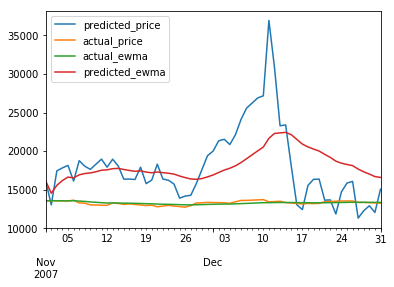

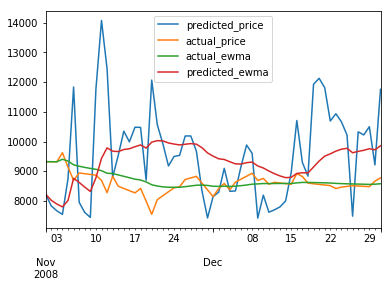

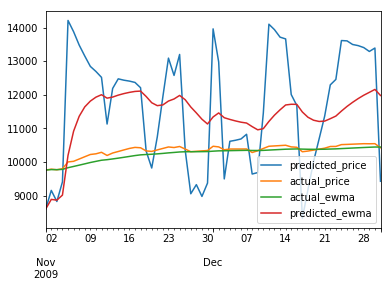

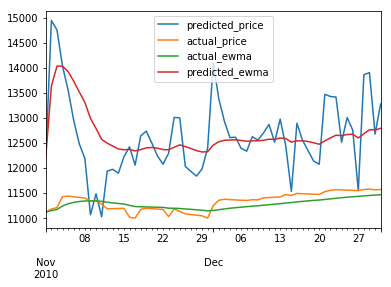

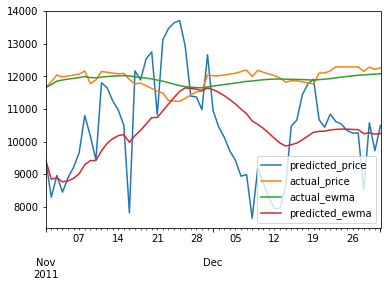

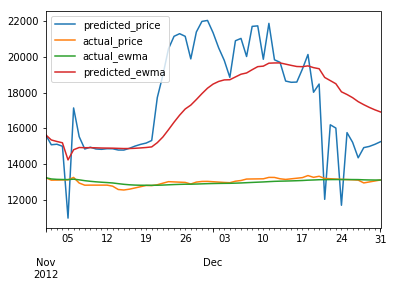

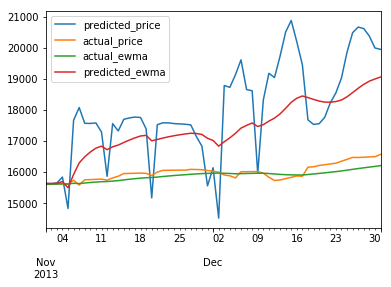

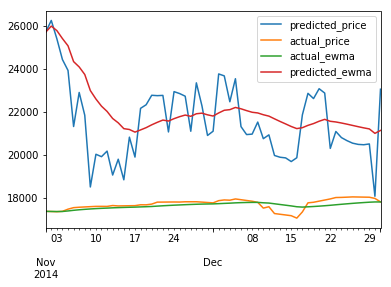

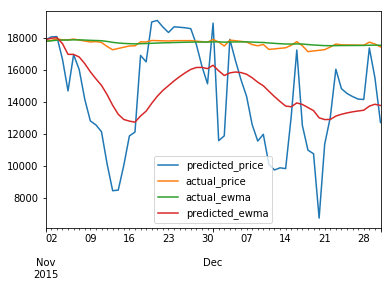

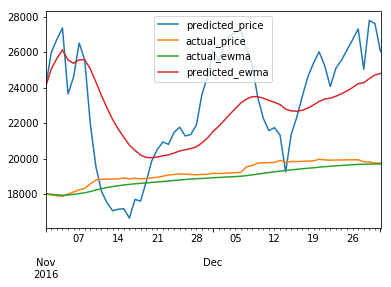

In [158]:
years = [2007 , 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction = []

import tensorflow as tf
sess = tf.Session()
sess.run(tf.global_variables_initializer())

epochs = 200
batch_size = 20

for year in years:
    mse_train = []
    mse_test = []
    start_train = str(year) + '-01-14'
    end_train = str(year) + '-10-31'
    start_test = str(year) + '-11-01'
    end_test = str(year) + '-12-31'
    train = df_main.ix[start_train:end_train]
    test = df_main.ix[start_test:end_test]
    
    # Number of stocks in training data
    n_stocks = 6

    # Neurons
    n_neurons_1 = 1024
    n_neurons_2 = 512
    n_neurons_3 = 256
    n_neurons_4 = 128

    # Session
    sess = tf.InteractiveSession()

    # Placeholder
    X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
    Y = tf.placeholder(dtype=tf.float32, shape=[None])

    # Initializers
    sigma = 0.001
    weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
    bias_initializer = tf.zeros_initializer()

    # Hidden weights
    W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
    bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
    W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
    bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
    W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
    bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
    W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
    bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

    # Output weights
    W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
    bias_out = tf.Variable(bias_initializer([1]))

    # Hidden layer
    hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
    hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
    hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
    hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

    # Output layer (transpose!)
    out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

    # Cost function
    mse = tf.reduce_mean(tf.squared_difference(out, Y))

    # Optimizer
    opt = tf.train.AdamOptimizer().minimize(mse)

    # Init
    sess.run(tf.global_variables_initializer())
    
    for i in range(epochs):
        
        sent_score = []
        for date in train.index:
            score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                                df_main.loc[date,'total'],df_main.loc[date,'positive'],
                               df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
            sent_score.append(score)
        n_train = np.asarray(sent_score)
        n_train = pd.DataFrame(n_train)
        
        for j in range(n_train.shape[0]):
            start = j*batch_size
            batch_train_x = n_train[start:start + batch_size]
            batch_train_y = train['price'][start:start + batch_size]
            sess.run(opt, feed_dict={X: batch_train_x, Y: batch_train_y})
            
    sent_score = []    
    for date in test.index:
        score = np.asarray([df_main.loc[date,'macd'],df_main.loc[date,'stochastics'],
                            df_main.loc[date,'total'],df_main.loc[date,'positive'],
                           df_main.loc[date,'neutral'],df_main.loc[date,'negative']])
        
        sent_score.append(score)
    
    n_test = np.asarray(sent_score)    
    
    pred = sess.run(out, feed_dict={X: n_test})
    #print(pred)

    
    
    idx = pd.date_range(start_test,end_test)
    
    pred_data = pd.DataFrame(data=pred[0][0:],index=idx,columns=['price'])
    
    pred_data['actual_value'] = test['price']
    pred_data['actual_ewma'] = pd.ewma(pred_data['actual_value'],span=30,freq='D')
    pred_data['predicted_ewma'] = pd.ewma(pred_data['price'],span=30,freq='D')
    
    # Changing column names
    pred_data.columns = ['predicted_price', 'actual_price','actual_ewma','predicted_ewma']
    pred_data.plot()
    

In [159]:
# Check the RMSE error
error = abs(pred_data['predicted_price'] - pred_data['actual_price'])
total_error = np.dot(error,error)
# Compute RMSE
rmse_error = np.sqrt(total_error/len(pred_data['predicted_price']))
print(rmse_error)

5055.043180051018


In [129]:
test.shape

(61, 7)

In [ ]:
# It is not better than Random Forest Regression !!

In [ ]:
negative_words = ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt",
     "ain't", "aren't", "can't", "couldn't", "daren't", "didn't", "doesn't",
     "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt", "neither",
     "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't",
     "neednt", "needn't", "never", "none", "nope", "nor", "not", "nothing", "nowhere",
     "oughtnt", "shant", "shouldnt", "uhuh", "wasnt", "werent",
     "oughtn't", "shan't", "shouldn't", "uh-uh", "wasn't", "weren't",
     "without", "wont", "wouldnt", "won't", "wouldn't", "rarely", "seldom", "despite"]

In [ ]:
positive_words = ["absolutely", "amazingly", "awfully", "completely", "considerably",
     "decidedly", "deeply" , "effing", "enormously",
     "entirely", "especially", "exceptionally", "extremely",
     "fabulously", "flipping", "flippin",
     "fricking", "frickin", "frigging", "friggin", "fully", "fucking",
     "greatly", "hella", "highly", "hugely", "incredibly",
     "intensely", "majorly", "more", "most", "particularly",
     "purely", "quite", "really", "remarkably",
     "so", "substantially",
     "thoroughly", "totally", "tremendously",
     "uber", "unbelievably", "unusually", "utterly",
     "very",
     "almost", "barely", "hardly", "just enough",
     "kind of", "kinda", "kindof", "kind-of",
     "less", "little", "marginally", "occasionally", "partly",
     "scarcely", "slightly", "somewhat",
     "sort of", "sorta", "sortof", "sort-of"]